# Diamonds

The data set we will be using for this is a well-known set of attributes that describe both the physical characteristics and prices of nearly 54,000 diamonds. 

We have a data frame with 53940 rows and 10 variables:

* price - price in US dollars (\$326--\$18,823)
* carat - weight of the diamond (0.2--5.01)
* cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color - diamond colour, from D (best) to J (worst)
* clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x - length in mm (0--10.74)
* y - width in mm (0--58.9)
* z - depth in mm (0--31.8)
* depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table - width of top of diamond relative to widest point (43--95)

This data set has been widely used for purposes of demonstrating machine learning algorithms that predict the price of a diamond. 

##**Analysis of Various Features**##

* Carat is a metric that is used to measure the weight of a diamond. One carat is equivalent to 200mg. Obviously, as a general rule diamond prices increase with diamond carat weight.

* Clarity in diamonds is generated from sheer pressure and heat below the ground. This may be a mark or line pattern inside a diamond. Also, there will be a mark or line in the outer layer of a diamond, which is called blemishes. Based on the amount of inclusion and blemishes, the clarity of a diamond is categorized such as FL, IF, VSS1, VSS2, VS1, VS2, SI1, SI2, I1, I2, I3. The categories mentioned above are ordered in descending order by the amount of presence of inclusion and blemishes. See below for pictures.

* Cut in diamonds measures three things:
  1. Brilliance: The reflection of white lights inside and outside of a diamond.
  2. Fire: The scattering of white light into all the colors of the rainbow.
  3. Scintillation: The amount of sparkle produced and the pattern of light and dark areas caused by reflection within a diamond.

The goal is to cut a diamond within an appropriate size shape, and angle such that the light entering the diamond should reflect and leave from the top surface. 

* Color in a diamond is categorized from D to Z letters and ordered in ascending by the amount of presence of color in a diamond. From the K onwards to till Z, we can see a yellowish color present.
  1. D ,E,F - Colorless 
  2. G,H,I,J - Near colorlessness 
  3. K, L, M - Faint color 
  4. N-R: Very Light Color 
  5. S-Z: light color

Below is a picture explaining what we mean by x, y, and z.
![Data](https://drive.google.com/uc?export=view&id=1mewlCY7i4q1nPMNyUjcU7rW16_2Aw6pY)

Below is a picture with more information on some of the features: ![Data](https://drive.google.com/uc?export=view&id=1KiXKOjRpRsg3Niy8jHVcCcl1y0B7kTy5)

And, lastly, here is some background via [Wikipedia](https://en.wikipedia.org/wiki/Diamond):
Diamond is a solid form of the element carbon with its atoms arranged in a crystal structure called diamond cubic. At room temperature and pressure, another solid form of carbon known as graphite is the chemically stable form, but diamond almost never converts to it. Diamond has the highest hardness and thermal conductivity of any natural material, properties that are utilized in major industrial applications such as cutting and polishing tools. They are also the reason that diamond anvil cells can subject materials to pressures found deep in the Earth.

Because the arrangement of atoms in diamond is extremely rigid, few types of impurity can contaminate it (two exceptions being boron and nitrogen). Small numbers of defects or impurities (about one per million of lattice atoms) color diamond blue (boron), yellow (nitrogen), brown (defects), green (radiation exposure), purple, pink, orange or red. Diamond also has relatively high optical dispersion.

Most natural diamonds have ages between 1 billion and 3.5 billion years. Most were formed at depths between 150 and 250 kilometres (93 and 155 mi) in the Earth's mantle, although a few have come from as deep as 800 kilometres (500 mi). Under high pressure and temperature, carbon-containing fluids dissolved various minerals and replaced them with diamonds. Much more recently (tens to hundreds of million years ago), they were carried to the surface in volcanic eruptions and deposited in igneous rocks known as kimberlites and lamproites.



## Data Summary and EDA

Although we explained the data above, below we write code to summarize the number of use cases, etc. We investigate the NaNs, we create charts to display value counts, we create histograms, and analyze our data (using matplotlib and seaborn).

In [ ]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/MAT5001/main/diamonds.csv")
df.drop(df.columns[0],axis=1,inplace=True)
print(df.shape)
print(df.head())

(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
#List number of unique values
#We see this matches with the information that is given about the data
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [ ]:
#here are the data types of each attribute
#as above, here is a list of the categorical types: cut, color, clarity
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
#check for nulls
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#check each categorical value
vals = df[['cut', 'color', 'clarity']].copy()
for x in range(len(vals.columns)):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")

cut:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

color:
['E' 'I' 'J' 'H' 'F' 'G' 'D']

clarity:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



We do a value counts for our categorical data.

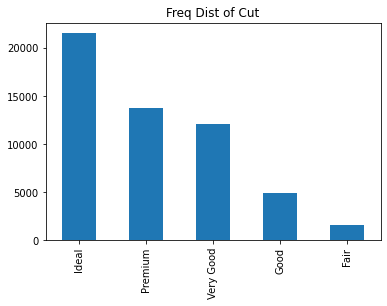

In [ ]:
%matplotlib inline

bplt = df['cut'].value_counts().plot.bar(title = "Freq Dist of Cut")
bplt;

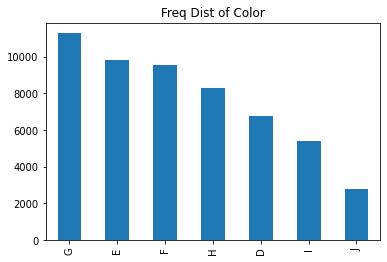

In [ ]:
bplt = df['color'].value_counts().plot.bar(title = "Freq Dist of Color")
bplt;

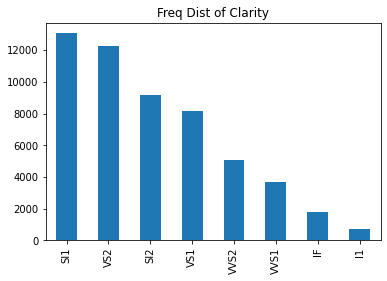

In [ ]:
bplt = df['clarity'].value_counts().plot.bar(title = "Freq Dist of Clarity")
bplt;

Overall we see that we do not have as many examples of lower quality diamonds as higher quality diamonds.

In [ ]:
#get the statistics of numeric data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#check if any of the data has zeros in it, which wouldn't make any sense
#since the length, width, or height of a diamond cannot be 0
print("The number of zeros:", len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)]))
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

The number of zeros: 20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


###**Categorical View**###

We now take a look at the categorical data in some different views. We check the number of items per category via numbers and via charts in order to determine whether or not there is an imbalance. We do see that our charts show that the Fair cut is much smaller than the other cuts. This is something we need to look into. We see the same thing about the clarity. We note the distribution and see if it matters in the future.

In [ ]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD + "Cut Data\n\n" + color.END, df['cut'].value_counts())
print(color.BOLD +"\n\nColor Data\n\n"+ color.END, df['color'].value_counts())
print(color.BOLD +"\n\nClarity Data\n\n"+ color.END, df['clarity'].value_counts())

Cut Data

 Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


Color Data

 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


Clarity Data

 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update

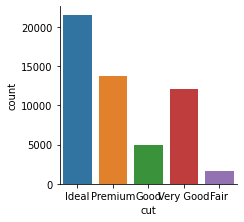

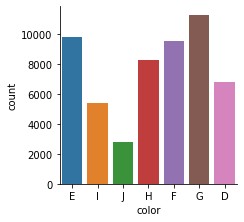

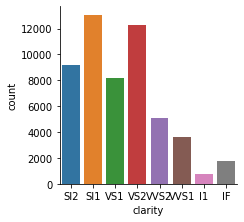

In [ ]:
#doing same charts as above using seaborn
sns.factorplot(x='cut', data=df , kind='count',size = 3, aspect=1.1 )
sns.factorplot(x='color', data=df , kind='count',size = 3,aspect=1.1 )
sns.factorplot(x='clarity', data=df , kind='count',size = 3,aspect=1.1 )

Below we do a histogram for each of the numeric varibles using matplotlib.  We note that all of these distributions are as expected.

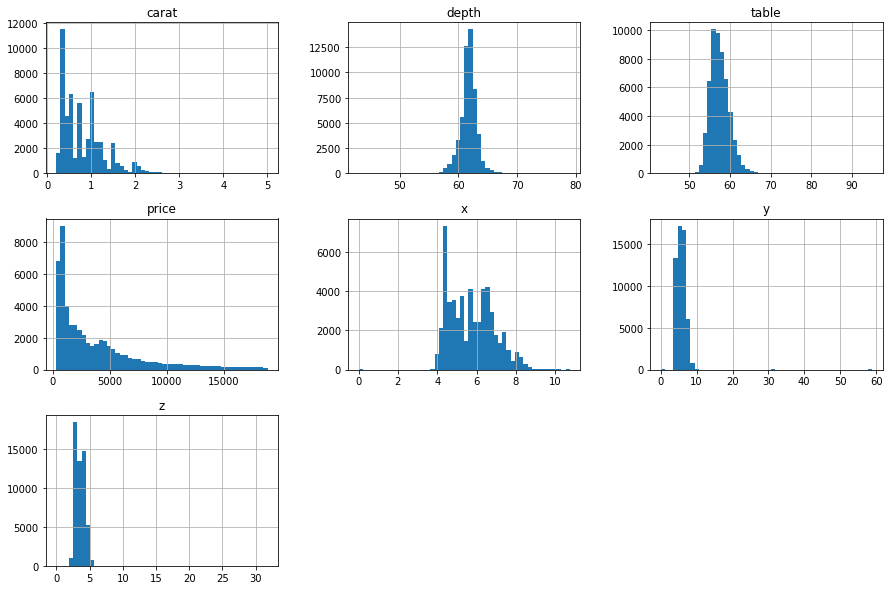

In [ ]:
#histograms
numericDataColumns = ['carat', 'depth', 'table','price','x','y','z']
vals = df[numericDataColumns].copy()
import matplotlib.pyplot as plt
vals.hist(bins=50, figsize=(15,10))
plt.show()

Below we do a histogram for each of the numeric variables using seaborn.

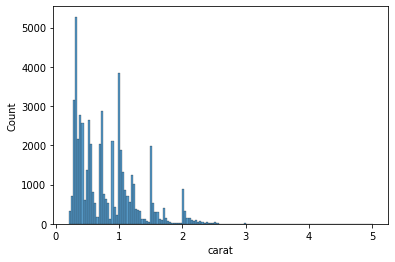

In [ ]:
sns.histplot(df['carat'])

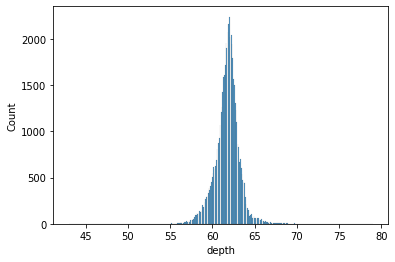

In [ ]:
sns.histplot(df['depth'])

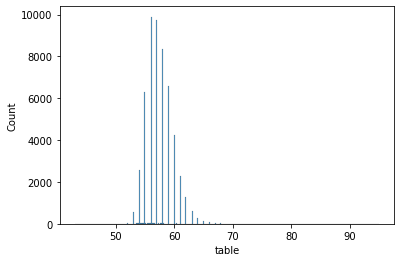

In [ ]:
sns.histplot(df['table'])

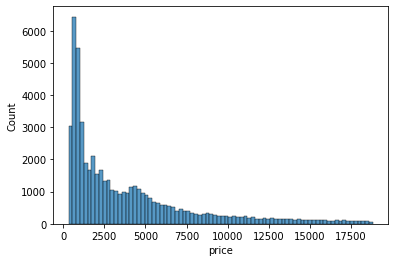

In [ ]:
sns.histplot(df['price'])

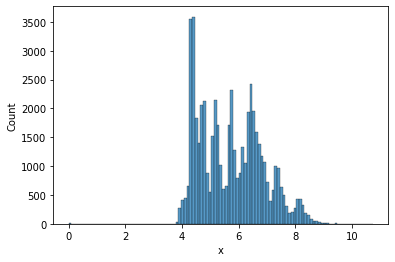

In [ ]:
sns.histplot(df['x'])

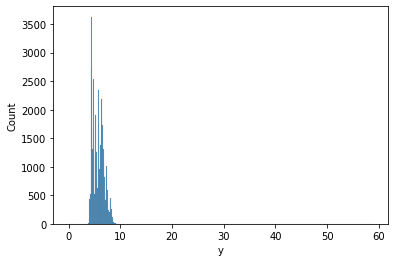

In [ ]:
sns.histplot(df['y'])

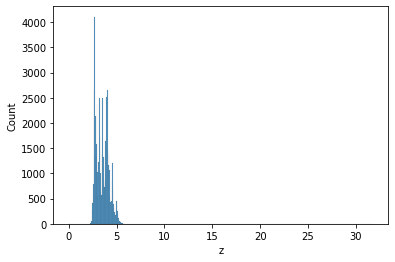

In [ ]:
sns.histplot(df['z'])

Here we do boxplots

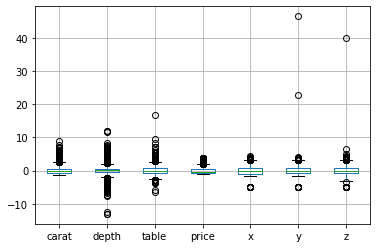

In [ ]:
#since price is very far outside the range of the others, we scale and then do boxplots

numericDataColumns = ['carat', 'depth', 'table','price','x','y','z']
vals = df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vals_scaled = scaler.fit_transform(vals)
vals_scaled = pd.DataFrame(vals_scaled, columns=numericDataColumns)

vals_scaled.plot.box(grid='True')

From the above scaled boxplot, we see that we have a large amount of outliers, which is more likely a characteristic of diamond data, than something needed to be fixed.

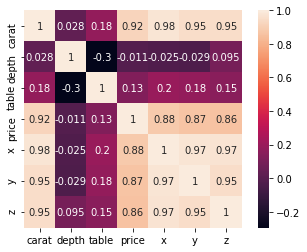

In [ ]:
# Correlation Map of our NON-CATEGORICAL DATA
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

### EDA Summary

Although we have some anomalies, as pointed out above (such as the length, width, or depth of a diamond being zero), we have not changed our data, so that we can do the inference section better.  

Overall, our data has outliers (especially price), but with diamonds, it is somewhat expected.

##Inference Section

In [ ]:
#What proportion of diamonds are between .30 and 1.08 carats?
#as a safety the output was verified in Excel (=COUNTIFS(carat,">=.3",carat,"<=1.08")
#to answer all the following question in python, we used python tools
#they should be self-evident
#I would only note that sometimes using logical operators is easier in numpy, so we switched the data using to_nmupy()

x = df['carat'].to_numpy()
possibility_1 = sum(i > .3 and i < 1.08 for i in x)
possibility_2 = sum(i >= .3 and i <= 1.08 for i in x)

print("Between and not including bounds: ", possibility_1/df.shape[0])
print("Between and including bounds: ", possibility_2/df.shape[0])

Between and not including bounds:  0.6939933259176864
Between and including bounds:  0.7468298109010011


In [ ]:
#How many of the diamonds have equal x and y dimensions?
#verified in Excel =SUMPRODUCT(--(x=y))

x = df['x'].to_numpy()
y = df['y'].to_numpy()

(x == y).sum()

17

In [ ]:
#How many of the diamonds have a carat value that is less than the mean carat value?
x = df['carat'].to_numpy()
mean_carat = x.mean()
(x < mean_carat).sum()

27966

In [ ]:
#How many diamonds have a Premium cut or better? (Premium or Ideal)
#verified in Excel (=COUNTIF(cut,"Premium")+COUNTIF(cut,"Ideal"))

cut = df['cut'].to_numpy()

Premium = (cut == 'Premium').sum()
Ideal = (cut == 'Ideal').sum()

print("The number of premium or better is ", Premium + Ideal)

The number of premium or better is  35342


In [ ]:
#Which diamond has the highest price per carat? What is its value?

ppc = df[['carat','price']].copy()
ppc['price per'] = df['price']/df['carat']
sorted_ppc =ppc.sort_values(by ='price per',ascending=False)
print(sorted_ppc.head())

       carat  price     price per
27635   1.04  18542  17828.846154
27530   1.07  18279  17083.177570
27226   1.03  17590  17077.669903
27457   1.07  18114  16928.971963
26998   1.02  17100  16764.705882


According to our analysis, the 27,635 diamond has the highest price per carat with a price of 18542.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


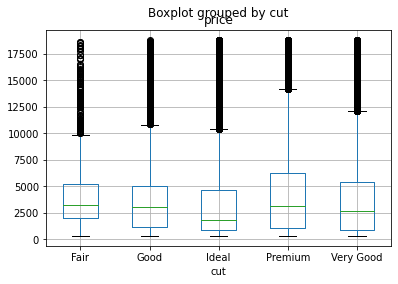

In [ ]:
#Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and
#discuss any conclusions you can draw from the appearance of the boxplots.

df.boxplot(column="price", by= "cut")

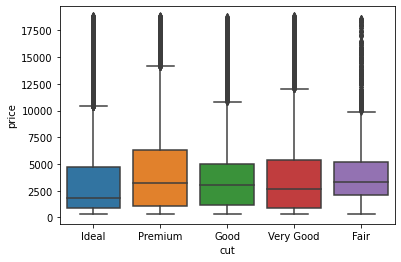

In [ ]:
#doing the same as above in seaborn
sns.boxplot(y ='price', x ='cut',data = df )

We note that our boxplots show that there are a lot of outliers. As mentioned, that may be a feature of diamonds, and not anything surprising.  We also note that the price is within a strangely similar range for all the different cuts.

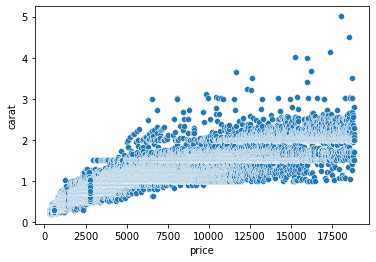

In [ ]:
#Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the
#relationship between those two attributes?

sns.scatterplot(x = 'price', y ='carat',data =df)

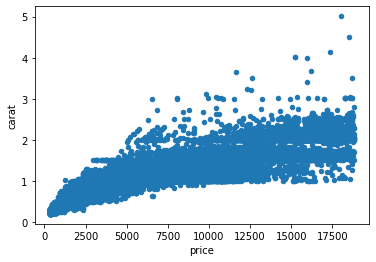

In [ ]:
df.plot(kind="scatter", x="price",  y="carat")

We see that there seems to be a log-linear relationship between these two variables.

#Conclusion

In conclusion, we did explored the data set, checking for NaNs and other tentative analysis issues. We did many charts explaining the relationship between variables, using boxplots for numeric data and bar charts for categorical data.  

We did an EDA, looking at each category and searching for relevant exposition.  We did not find anything surprising, except for the number of outliers, as noted.

 ###References

 I referenced my own [work](https://colab.research.google.com/drive/1ukkElEWtvr7E8ZjuLqgQAA4d-1_dCOHn#scrollTo=IFulUXOIWjhv) from the summer Data Science course, which allowed me to quickly draw in the general exposition and some of the EDA work.  